<h1>Diabetes Prediction Model - Classification Method</h1>

In [1]:
## Installing dependencies
%pip install pandas numpy scikit-learn seaborn matplotlib scipy

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp311-cp311-win_amd64.whl.metadata (168 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.3-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl (2.6 MB)
U


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [4]:
## Exploring our dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
## Checking if dataset contains any null values
df.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [8]:
## CHanging object to binary integers 1 or 0
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["gender"] = label_encoder.fit_transform(df['gender'])

In [9]:
df['gender'].head()  ## Male 1 Female 0

0    0
1    0
2    1
3    0
4    1
Name: gender, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 6.9+ MB


<Axes: xlabel='smoking_history', ylabel='count'>

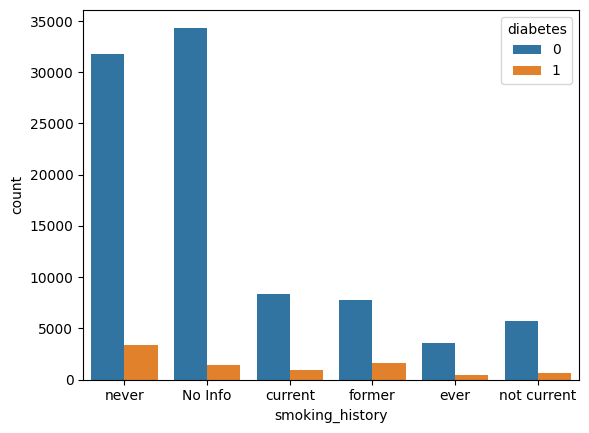

In [11]:
## Checking the importance of smoking history column
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='smoking_history', hue='diabetes')  ## In our case this column is not much impact on whether someone has diabetes or not.


In [12]:
## Performing Chi-Square test to determin significant relationship between two categorical variables.
## Creating continguency table to summarixe the count of occurrences for each combination.
contingeny_table = pd.crosstab(df['smoking_history'], df['diabetes'])
contingeny_table

diabetes,0,1
smoking_history,,
No Info,34362,1454
current,8338,948
ever,3532,472
former,7762,1590
never,31749,3346
not current,5757,690


In [13]:
## Chi-Squre Test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingeny_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}") ## If p-value < 0.05, the column is significant keep it otherwise it can be dropped because it's not significant
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 1956.0944200848764
p-value: 0.0
Degrees of Freedom: 5


In [14]:
## Keep the smoking_history column
## Checking the natural order

df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [15]:
## There seems to be a natural order here but, still unsure use OHE
df = pd.get_dummies(df, columns=["smoking_history"], drop_first=True)

In [16]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False


In [17]:
## Cross checking the coloumns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   gender                       100000 non-null  int64  
 1   age                          100000 non-null  float64
 2   hypertension                 100000 non-null  int64  
 3   heart_disease                100000 non-null  int64  
 4   bmi                          100000 non-null  float64
 5   HbA1c_level                  100000 non-null  float64
 6   blood_glucose_level          100000 non-null  int64  
 7   diabetes                     100000 non-null  int64  
 8   smoking_history_current      100000 non-null  bool   
 9   smoking_history_ever         100000 non-null  bool   
 10  smoking_history_former       100000 non-null  bool   
 11  smoking_history_never        100000 non-null  bool   
 12  smoking_history_not current  100000 non-null  bool   
dtype

In [18]:
from sklearn.model_selection import train_test_split

## Divinding dataset into Independent & Dependent
X = df.drop('diabetes', axis=1)

In [19]:
## Getting Dependent features
y = df["diabetes"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
## Importing the classification model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)  ## max_iter() param allows the model more iteration to converge

<p>Standard Scaling transforms the features in dataset so that each feature has a mean of 0 and a standard deviation of 1.</p>

In [22]:
## Doing standard scaling - feature scaling technique that standardizes the features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [25]:
## Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<h2>Now, doing Predictions</h2>

In [26]:
y_pred = model.predict(X_test)

In [27]:
## Evaluating models performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print(f"Classification report:\n{classification_report(y_test, y_pred)}")

print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 95.90%
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Confusion matrix:
[[18126   166]
 [  654  1054]]


<h5>Training Model on Unseen Data</h5>

In [28]:
unseen_data = pd.DataFrame(
    {
        "gender": ["Male", "Female", "Male", "Female", "Male", "Female"],
        "age": [50, 42, 63, 56, 38, 36],
        "hypertension": [0, 1, 1, 0, 0, 1],
        "heart_disease": [1, 0, 1, 0, 0, 1],
        "smoking_history": ["former", "never", "current", "former", "never", "never"],
        "bmi": [28.5, 31.2, 34.0, 29.4, 25.8, 29.71],
        "HbA1c_level": [6.3, 5.9, 7.2, 5.7, 5.6, 10.3],
        "blood_glucose_level": [140, 120, 160, 110, 100, 130],
    }
)

In [29]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               6 non-null      object 
 1   age                  6 non-null      int64  
 2   hypertension         6 non-null      int64  
 3   heart_disease        6 non-null      int64  
 4   smoking_history      6 non-null      object 
 5   bmi                  6 non-null      float64
 6   HbA1c_level          6 non-null      float64
 7   blood_glucose_level  6 non-null      int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 516.0+ bytes


In [30]:
## CHanging object to binary integers 1 or 0
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
unseen_data["gender"] = label_encoder.fit_transform(unseen_data["gender"])

In [31]:
unseen_data["gender"].head()

0    1
1    0
2    1
3    0
4    1
Name: gender, dtype: int64

In [32]:
## OHE for smoking_history column
unseen_data = pd.get_dummies(unseen_data, columns=["smoking_history"], drop_first=True)

In [33]:
## Converting numpy array to DataFrame to avoid attribute error at next cell
X_train_df = pd.DataFrame(
    X_train,
    columns=[
        "gender",
        "age",
        "hypertension",
        "heart_disease",
        "bmi",
        "HbA1c_level",
        "blood_glucose_level",
        "smoking_history_current",
        "smoking_history_ever",
        "smoking_history_former",
        "smoking_history_never",
        "smoking_history_not current",
    ],
)

In [34]:
unseen_data = unseen_data.reindex(columns=X_train_df.columns, fill_value=0)

In [35]:
## Scaling the data
unseen_data_scaled = scaler.transform(unseen_data)

In [36]:
## Making predictions
predictions = model.predict(unseen_data_scaled)

In [37]:
## Predictions of New Data
predictions

array([0, 0, 1, 0, 0, 1])

In [38]:
for i, prediction in enumerate(predictions):
    print(f"Patient {i+1} is {'Diabetic' if prediction == 1 else 'Non-Diabetic'}")

Patient 1 is Non-Diabetic
Patient 2 is Non-Diabetic
Patient 3 is Diabetic
Patient 4 is Non-Diabetic
Patient 5 is Non-Diabetic
Patient 6 is Diabetic


<h5>Evaluating Model Performance on Unseen_Data</h5>

In [39]:
## Adding target label to unseen_data
unseen_data["diabetes"] = predictions

In [40]:
## Evaluating models performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(unseen_data["diabetes"], predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

print(
    f"Classification report:\n{classification_report(unseen_data['diabetes'], predictions)}"
)

print(f"Confusion matrix:\n{confusion_matrix(unseen_data['diabetes'], predictions)}")

Accuracy: 100.00%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Confusion matrix:
[[4 0]
 [0 2]]


In [41]:
## Analysing which columns is contributing the most to our model

coefficients = model.coef_[0] ## Unlike RandomForest, coefficients are used to calculate the importance

feature_importance_df = pd.DataFrame(
    {"Feature": X_train_df.columns, "Importance": coefficients}
).sort_values("Importance", ascending=False)


feature_importance_df

,Feature,Importance
5,HbA1c_level,2.491590
6,blood_glucose_level,1.357685
1,age,1.054389
4,bmi,0.585112
10,smoking_history_never,0.270339
7,smoking_history_current,0.219378
2,hypertension,0.188038
9,smoking_history_former,0.177394
3,heart_disease,0.145057
11,smoking_history_not current,0.138373


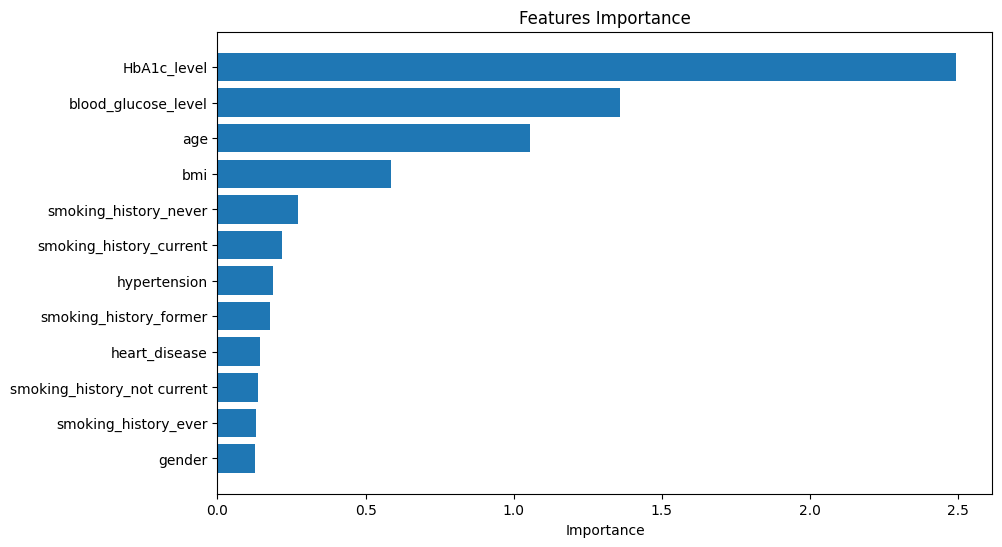

In [42]:
## Plotting the graph of the above feature analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel('Importance')
plt.title('Features Importance')
plt.gca().invert_yaxis()  # Inverting y axis so it start most important comes first
plt.show()


In [43]:
import joblib

joblib.dump(model, 'ClassificationModel_Diabetes-Prediction.pkl')

['ClassificationModel_Diabetes-Prediction.pkl']

In [44]:
loaded_model = joblib.load('ClassificationModel_Diabetes-Prediction.pkl')

In [45]:
X_test = [
    {
        "gender": ["Male", "Female", "Male", "Female", "Male", "Female"],
        "age": [50, 42, 63, 56, 38, 36],
        "hypertension": [0, 1, 1, 0, 0, 1],
        "heart_disease": [1, 0, 1, 0, 0, 1],
        "smoking_history": ["former", "never", "current", "former", "never", "never"],
        "bmi": [28.5, 31.2, 34.0, 29.4, 25.8, 29.71],
        "HbA1c_level": [6.3, 5.9, 7.2, 5.7, 5.6, 10.3],
        "blood_glucose_level": [140, 120, 160, 110, 100, 130],
    }
]

predictions = loaded_model.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[{'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'], 'age': [50, 42, 63, 56, 38, 36], 'hypertension': [0, 1, 1, 0, 0, 1], 'heart_disease': [1, 0, 1, 0, 0, 1], 'smoking_history': ['former', 'never', 'current', 'former', 'never', 'never'], 'bmi': [28.5, 31.2, 34.0, 29.4, 25.8, 29.71], 'HbA1c_level': [6.3, 5.9, 7.2, 5.7, 5.6, 10.3], 'blood_glucose_level': [140, 120, 160, 110, 100, 130]}].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.